# Zakharov function
---
**Description**:

- Optimization (min)
- Single-objective
- Constraints (no)
---

Minimize the equation given by:

- $f\left(\mathbf{x}\right) = \sum_{i=1}^{d}x_i^2 + \left(\sum_{i=1}^{d}0.5ix_i\right)^2 + \left(\sum_{i=1}^{d}0.5ix_i\right)^4$

where: $-10 \le x_i \le 10$.

Global Minimum:

- $f\left(\mathbf{\hat{x}}\right) = 0$, at $\mathbf{\hat{x}} = [0, 0, ..., 0]$

## Step 1: Import python libraries and set up the project directory

In [8]:
import os, sys
import numpy as np
from math import isclose
from functools import lru_cache
import matplotlib.pyplot as plt

PROJECT_DIR = os.path.abspath('..')

if PROJECT_DIR not in sys.path:
    sys.path.append(PROJECT_DIR)

## Step 2: Import the custom PSO code

In [9]:
from star_pso.population.swarm import Swarm
from star_pso.population.particle import Particle
from star_pso.engines.standard_pso import StandardPSO
from star_pso.utils.auxiliary import cost_function

## Step 3: Define the objective function

In [10]:
@lru_cache(maxsize=8)
def calc_indices(n: int):
    return np.arange(n)
# _end_def_

# Objective function.
@cost_function(minimize=True)
def fun_zakharov(x: np.ndarray, **kwargs) -> tuple[float, bool]:

    # Create an array of indices.
    indices = calc_indices(len(x))

    # Compute the sum of 'i * x_i'.
    sum_xi = 0.5*np.sum(indices * x)
        
    # Compute the final value.
    f_value = np.sum(x**2) + sum_xi**2 + sum_xi**4

    # Condition for termination.
    solution_found = isclose(f_value, 0.0, abs_tol=1.0e-8)

    # Return the solution tuple.
    return f_value, solution_found
# _end_def_

## Step 4: Set the PSO parameters

    - Number of particles 'N'
    - Initial population
    - PSO object

In [11]:
# Set a seed for reproducible initial population.
SEED = 1821

# Random number generator.
rng = np.random.default_rng(SEED)

# Define the number of optimizing variables.
D = 10

# Define the number of particles.
N = 100

# Sample the initial points randomly.
X_t0 = rng.uniform(-10.0, +10.0, size=(N, D))

# Initial population.
swarm_t0 = Swarm([Particle(x) for x in X_t0])

# Create the StandardPSO object that will carry on the optimization.
test_PSO = StandardPSO(initial_swarm = swarm_t0,
                       obj_func = fun_zakharov,
                       x_min = -10.0,
                       x_max = +10.0,
                       copy=True)

## Step 5: Run the optimization process

In [12]:
test_PSO.run(max_it = 1000,
             options = {"w0": 0.70, "c1": 1.50, "c2": 1.50, "mode": "g_best"},
             reset_swarm = False, verbose = False, adapt_params = True)

01/17/2026 19:10:28 INFO: Initial f_optimal = -276.1114
01/17/2026 19:10:28 WARNING: StandardPSO found a solution at iteration 130


Final f_optimal = -0.0000
run: elapsed time = 0.323 seconds.


## Step 6: Extract the data for analysis and plotting

In [13]:
# Get the optimal solution from the PSO.
i_opt, f_opt, x_opt = test_PSO.get_optimal_values()

# Display the (final) optimal value.
print(f"Optimum Found: {abs(f_opt):.6f}, at iteration {i_opt}.\n")

# Display each particle position value.
for i, xi in enumerate(x_opt, start=1):
    print(f"x{i} = {xi:>10.6f}")
# _end_for_

Optimum Found: 0.000000, at iteration 130.

x1 =   0.000003
x2 =   0.000008
x3 =  -0.000022
x4 =   0.000005
x5 =  -0.000028
x6 =   0.000003
x7 =   0.000033
x8 =   0.000034
x9 =  -0.000021
x10 =  -0.000023


## Plot the adapted parameters

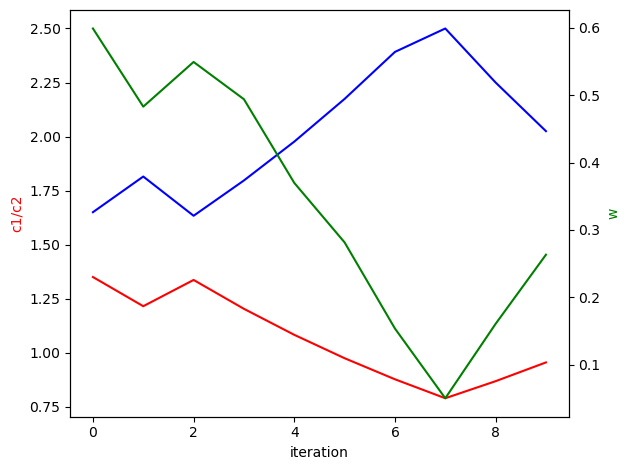

In [14]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('iteration')
ax1.set_ylabel('c1/c2', color="red")
ax1.plot(test_PSO.stats['cogntv_c1'], color="red")
ax1.plot(test_PSO.stats['social_c2'], color="blue")

ax2 = ax1.twinx()

ax2.set_ylabel('w', color="green")
ax2.plot(test_PSO.stats['inertia_w'], color="green")

fig.tight_layout()

plt.show()

### End of file